In [1]:
from numpy import *
import numpy as np
from numpy.random import *
from numpy.linalg import *
import matplotlib.pyplot as plt
from datetime import datetime
import pandas as pd

In [2]:
# fungsi sigmoid
sigmoid = lambda Z:1/(1+exp(-Z))

# turunan fungsi
dsigmoid = lambda A: A*(1-A)

In [3]:
X = array([[0,0],[0,1],[1,0],[1,1]])
print(X)
# Tabel Logika
LogicGate = {"AND":[[0],[0],[0],[1]],
             "NAND":[[1],[1],[1],[0]],
             "OR":[[0],[1],[1],[1]],
             "NOR":[[1],[0],[0],[0]],
             "XOR":[[0],[1],[1],[0]],
             "XNOR":[[1],[0],[0],[1]]} #dictionary (isinya bisa string segala macam)
y = LogicGate["XOR"]

#print(LogicGate["AND"], LogicGate[" "])

[[0 0]
 [0 1]
 [1 0]
 [1 1]]


Single Layer

Epoch= 0 Nilai Cost [[1.32850985]]
Epoch= 20 Nilai Cost [[1.11023846]]
Epoch= 40 Nilai Cost [[1.0268122]]
Epoch= 60 Nilai Cost [[1.0122703]]
Epoch= 80 Nilai Cost [[1.00827488]]
[[0.         0.44182392]
 [1.         0.48240397]
 [1.         0.50563944]
 [0.         0.54634374]]


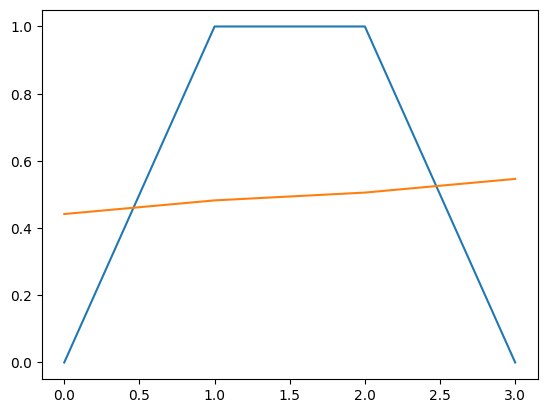

In [4]:
# Parameter GD
alpha = 0.1 #learning rate
epochs = 100 #iterasi (banyaknya proses belajar)
[N,K] = shape(X) #N banyaknya observasi/input, K banyaknya fitur/label

Ni = K #banyaknya neuron di input layer
No = 1 #banyaknya neuron di output layer

seed(20240221)

w0 = rand(Ni,No)
b0 = rand(1,No)

A0 = X
yhat = []
cost = []
for idx in range(epochs):
  #forward propagation
  Z1 = A0@w0 + b0             #reaksi kimia ..
  A1 = sigmoid(Z1)          #listrik ...

  C = (y-A1).T@(y-A1) #cost

  #back propagation
  dCdA1 = -2*(y-A1)
  dCdZ1 = dCdA1*dsigmoid(A1)

  dCdw0 = A0.T@dCdZ1
  dCdb0 = ones([1,N])@dCdZ1

  w0 = w0 - alpha*dCdw0
  b0 = b0 - alpha*dCdb0

  if idx%(epochs/5) == 0:
    yhat.append(A1.squeeze())
    cost.append(C)
    print("Epoch=", idx, "Nilai Cost", C)

print(hstack([y,A1]))
plt.plot(y)
plt.plot(A1)

Double Layer

Epoch= 0 Nilai Cost [[1.16275416]]
Epoch= 200 Nilai Cost [[0.80190395]]
Epoch= 400 Nilai Cost [[0.03580109]]
Epoch= 600 Nilai Cost [[0.011759]]
Epoch= 800 Nilai Cost [[0.00677028]]
[[0.         0.03694332]
 [1.         0.96732809]
 [1.         0.96728042]
 [0.         0.03464688]]


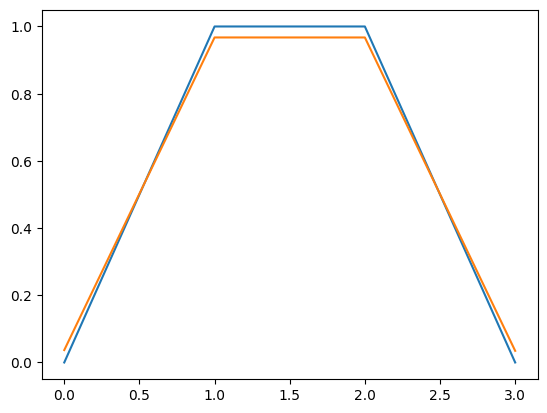

In [5]:
# Parameter GD
alpha = 0.9 #learning rate
epochs = 1000 #iterasi (banyaknya proses belajar)
[N,K] = shape(X) #N banyaknya observasi/input, K banyaknya fitur/label

Ni = K #banyaknya neuron di input layer
Nh1 = 3 #banyaknya neuron di hidden layer 1
No = 1 #banyaknya neuron di output layer

w0 = rand(Ni,Nh1)
b0 = rand(1,Nh1)
w1 = rand(Nh1,No)
b1 = rand(1,No)

#seed(20240221)

A0 = X
yhat = []
cost = []

for idx in range(epochs):
  #forward propagation
  #layer 1 (hidden layer)
  Z1 = A0@w0 + b0             #reaksi kimia ..
  A1 = sigmoid(Z1)          #listrik ...

  #layer 2 (output layer)
  Z2 = A1@w1 + b1             #reaksi kimia ..
  A2 = sigmoid(Z2)          #listrik ...

  C = (y-A2).T@(y-A2) #cost

  #back propagation
  #layer 2
  dCdA2 = -2*(y-A2)
  dCdZ2 = dCdA2*dsigmoid(A2)

  #layer 1
  dCdA1 = dCdZ2@w1.T
  dCdZ1 = dCdA1*dsigmoid(A1)

  dCdw1 = A1.T@dCdZ2
  dCdw0 = A0.T@dCdZ1

  dCdb1 = ones([1,N])@dCdZ2
  dCdb0 = ones([1,N])@dCdZ1

  #gradient descent
  w1 = w1 - alpha*dCdw1
  b1 = b1 - alpha*dCdb1
  w0 = w0 - alpha*dCdw0
  b0 = b0 - alpha*dCdb0

  if idx%(epochs/5) == 0:
    yhat.append(A2.squeeze())
    cost.append(C)
    print("Epoch=", idx, "Nilai Cost", C)

print(hstack([y,A2]))
plt.plot(y)
plt.plot(A2)

Triple Layer

Epoch= 0 Nilai Cost [[1.5613145]]
Epoch= 200 Nilai Cost [[0.99821829]]
Epoch= 400 Nilai Cost [[0.98666982]]
Epoch= 600 Nilai Cost [[0.70049157]]
Epoch= 800 Nilai Cost [[0.2481933]]
[[0.         0.03902119]
 [1.         0.9515441 ]
 [1.         0.95031656]
 [0.         0.05564062]]


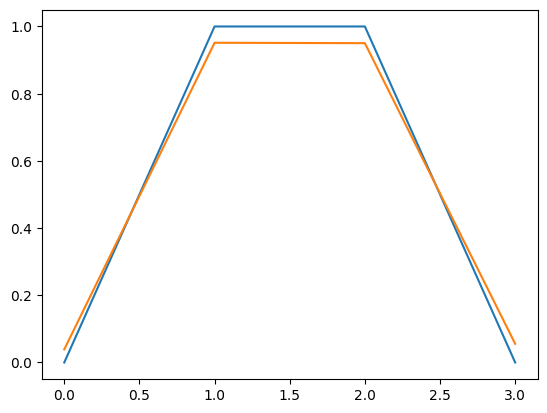

In [6]:
# Parameter GD
alpha = 0.9 #learning rate
epochs = 1000 #iterasi (banyaknya proses belajar)
[N,K] = shape(X) #N banyaknya observasi/input, K banyaknya fitur/label

Ni = K #banyak neuron di input layer
Nh1 = 3 #banyak neuron di hidden layer 1
Nh2 = 3 #banyak neuron di hidden layer 2
No = 1 #banyak neuron di output layer

w0 = rand(Ni,Nh1)
b0 = rand(1,Nh1)
w1 = rand(Nh1,Nh2)
b1 = rand(1,Nh2)
w2 = rand(Nh2,No)
b2 = rand(1,No)

#seed(20240221)

A0 = X
yhat = []
cost = []

for idx in range(epochs):
  #forward propagation
  #layer 1 (hidden layer)
  Z1 = A0@w0 + b0             #reaksi kimia ..
  A1 = sigmoid(Z1)          #listrik ...

  #layer 2 (output layer)
  Z2 = A1@w1 + b1             #reaksi kimia ..
  A2 = sigmoid(Z2)          #listrik ...

  #layer 3 (output layer)
  Z3 = A2@w2 + b2               #reaksi kimia ..
  A3 = sigmoid(Z3)          #listrik

  C = (y-A3).T@(y-A3) #cost

  #back propagation
  #layer 3
  dCdA3 = -2*(y-A3)
  dCdZ3 = dCdA3*dsigmoid(A3)

  #layer 2
  dCdA2 = dCdZ3@w2.T
  dCdZ2 = dCdA2*dsigmoid(A2)

  #layer 1
  dCdA1 = dCdZ2@w1.T
  dCdZ1 = dCdA1*dsigmoid(A1)

  dCdw2 = A2.T@dCdZ3
  dCdw1 = A1.T@dCdZ2
  dCdw0 = A0.T@dCdZ1

  dCdb2 = ones([1,N])@dCdZ3
  dCdb1 = ones([1,N])@dCdZ2
  dCdb0 = ones([1,N])@dCdZ1

  #gradient descent
  w2 = w2 - alpha*dCdw2
  b2 = b2 - alpha*dCdb2
  w1 = w1 - alpha*dCdw1
  b1 = b1 - alpha*dCdb1
  w0 = w0 - alpha*dCdw0
  b0 = b0 - alpha*dCdb0

  if idx%(epochs/5) == 0:
    yhat.append(A3.squeeze())
    cost.append(C)
    print("Epoch=", idx, "Nilai Cost", C)

print(hstack([y,A3]))
plt.plot(y)
plt.plot(A3)